In [17]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_customer_churn.csv')
df

,Monthly_Spending,Visit_Frequency,Customer_Support_Calls,Membership_Years,Discounts_Used,Churn
0,422,2,0,2,12,0
1,100,4,3,5,19,0
2,67,5,9,7,1,0
3,443,21,2,8,18,0
4,19,14,6,7,18,0
...,...,...,...,...,...,...
7995,281,10,0,4,16,0
7996,283,12,0,8,6,0
7997,452,9,1,2,17,0
7998,239,23,5,9,9,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Monthly_Spending        8000 non-null   int64
 1   Visit_Frequency         8000 non-null   int64
 2   Customer_Support_Calls  8000 non-null   int64
 3   Membership_Years        8000 non-null   int64
 4   Discounts_Used          8000 non-null   int64
 5   Churn                   8000 non-null   int64
dtypes: int64(6)
memory usage: 375.1 KB


In [4]:
df.describe()

,Monthly_Spending,Visit_Frequency,Customer_Support_Calls,Membership_Years,Discounts_Used,Churn
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,253.262625,15.01325,4.525500,4.535250,9.604250,0.003125
std,142.506722,8.42944,2.858299,2.847634,5.815463,0.055818
min,10.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,8.00000,2.000000,2.000000,5.000000,0.000000
50%,252.000000,15.00000,5.000000,5.000000,10.000000,0.000000
75%,378.000000,22.00000,7.000000,7.000000,15.000000,0.000000
max,499.000000,29.00000,9.000000,9.000000,19.000000,1.000000


In [5]:
df.isnull().sum()

,0
Monthly_Spending,0
Visit_Frequency,0
Customer_Support_Calls,0
Membership_Years,0
Discounts_Used,0
Churn,0


In [9]:
df['Churn'].value_counts()

,count
Churn,
0,7975
1,25


In [8]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)

(15950, 5)
(15950,)


In [10]:
y_resampled.value_counts()

,count
Churn,
0,7975
1,7975


In [7]:
X = df.iloc[:,:-1]
y = df['Churn']

print(X)
print(y)

      Monthly_Spending  Visit_Frequency  Customer_Support_Calls  Membership_Years  Discounts_Used
0                  422                2                       0                 2              12
1                  100                4                       3                 5              19
2                   67                5                       9                 7               1
3                  443               21                       2                 8              18
4                   19               14                       6                 7              18
...                ...              ...                     ...               ...             ...
7995               281               10                       0                 4              16
7996               283               12                       0                 8               6
7997               452                9                       1                 2              17
7998               2

In [11]:
corr_matrix = df.corr()
corr_matrix

,Monthly_Spending,Visit_Frequency,Customer_Support_Calls,Membership_Years,Discounts_Used,Churn
Monthly_Spending,1.000000,0.006609,0.014288,-0.017528,-0.002878,-0.087141
Visit_Frequency,0.006609,1.000000,0.007862,0.011657,-0.016669,-0.081392
Customer_Support_Calls,0.014288,0.007862,1.000000,-0.008159,0.000524,0.050825
Membership_Years,-0.017528,0.011657,-0.008159,1.000000,-0.005204,0.002846
Discounts_Used,-0.002878,-0.016669,0.000524,-0.005204,1.000000,0.009202
Churn,-0.087141,-0.081392,0.050825,0.002846,0.009202,1.000000


<Axes: >

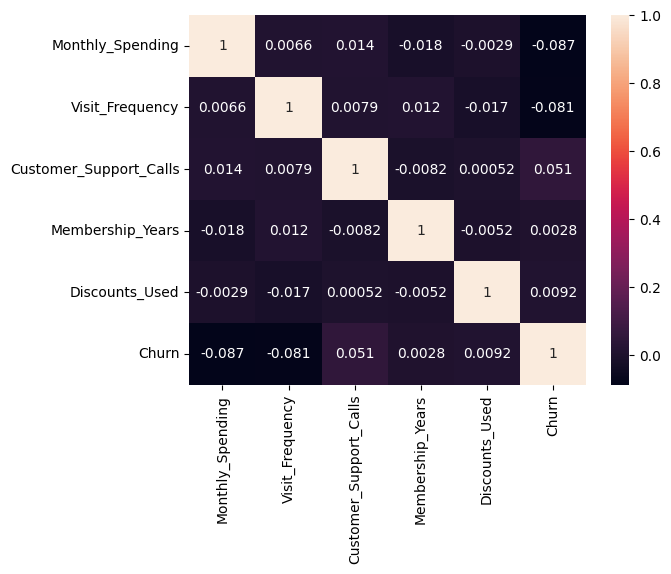

In [12]:
sns.heatmap(corr_matrix, annot=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [15]:
print('Accuracy: ', accuracy_score(y_test, lr_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, lr_pred))
print('Classification Report',classification_report(y_test, lr_pred))

Accuracy:  0.995625
Confusion Matrix:  [[1592    2]
 [   5    1]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1594
           1       0.33      0.17      0.22         6

    accuracy                           1.00      1600
   macro avg       0.67      0.58      0.61      1600
weighted avg       0.99      1.00      0.99      1600



In [18]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [19]:
print('Accuracy: ', accuracy_score(y_test, dt_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, dt_pred))
print('Classification Report',classification_report(y_test, dt_pred))

Accuracy:  1.0
Confusion Matrix:  [[1594    0]
 [   0    6]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1594
           1       1.00      1.00      1.00         6

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [20]:
rt_model = RandomForestClassifier()
rt_model.fit(X_train, y_train)
rt_pred = rt_model.predict(X_test)

In [21]:
print('Accuracy: ', accuracy_score(y_test, rt_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, rt_pred))
print('Classification Report',classification_report(y_test, rt_pred))

Accuracy:  1.0
Confusion Matrix:  [[1594    0]
 [   0    6]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1594
           1       1.00      1.00      1.00         6

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

